In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import seaborn as sns
import plotly.express as px

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('car_prices.csv')

# Descripción del dataset/ *Dataset description*

**Descripción del conjunto de datos:**

El "Conjunto de datos de Ventas de Vehículos y Tendencias del Mercado" proporciona una colección completa de información relacionada con las transacciones de venta de varios vehículos. Este conjunto de datos abarca detalles como el año, marca, modelo, recorte, tipo de carrocería, tipo de transmisión, VIN (Número de Identificación del Vehículo), estado de registro, clasificación de condición, lectura del odómetro, colores exteriores e interiores, información del vendedor, valores del Informe del Mercado de Manheim (MMR), precios de venta y fechas de venta.
La información de venta de autos es una muestra que abarca un año y medio: del 2014 hasta mediados del 2015.

**Características clave:**

Detalles del Vehículo: Incluye información específica sobre cada vehículo, como su marca, modelo, recorte y año de fabricación.

Información de Transacciones: Proporciona información sobre las transacciones de venta, incluidos los precios de venta y las fechas de venta.

Tendencias del Mercado: Los valores de MMR ofrecen una estimación del valor de mercado de cada vehículo, permitiendo el análisis de tendencias y fluctuaciones del mercado.

Condición y Kilometraje: Contiene datos sobre la condición de los vehículos, así como las lecturas del odómetro, lo que permite analizar cómo estos factores influyen en los precios de venta.

**Posibles casos de uso:**

Análisis de Mercado: Los investigadores y analistas pueden utilizar este conjunto de datos para estudiar las tendencias en el mercado automotriz, incluidas las fluctuaciones de precios según factores como la condición y el kilometraje del vehículo.

Modelado Predictivo: Los científicos de datos pueden emplear este conjunto de datos para desarrollar modelos predictivos que estimen los precios de los vehículos según diversos atributos.

Perspectivas Empresariales: Los profesionales de la industria automotriz, concesionarios e instituciones financieras pueden obtener información sobre las preferencias del consumidor, la demanda del mercado y estrategias de precios.

***Dataset Description:***

*The "Vehicle Sales and Market Trends Dataset" provides a comprehensive collection of information pertaining to the sales transactions of various vehicles. This dataset encompasses details such as the year, make, model, trim, body type, transmission type, VIN (Vehicle Identification Number), state of registration, condition rating, odometer reading, exterior and interior colors, seller information, Manheim Market Report (MMR) values, selling prices, and sale dates.*

***Key Features:***

*Vehicle Details: Includes specific information about each vehicle, such as its make, model, trim, and manufacturing year.*

*Transaction Information: Provides insights into the sales transactions, including selling prices and sale dates.*

*Market Trends: MMR values offer an estimate of the market value of each vehicle, allowing for analysis of market trends and fluctuations.*

*Condition and Mileage: Contains data on the condition of the vehicles as well as their odometer readings, enabling analysis of how these factors influence selling prices.*

***Potential Use Cases:***

*Market Analysis: Researchers and analysts can utilize this dataset to study trends in the automotive market, including pricing fluctuations based on factors such as vehicle condition and mileage*.

*Predictive Modeling: Data scientists can employ this dataset to develop predictive models for estimating vehicle prices based on various attributes.*

*Business Insights: Automotive industry professionals, dealerships, and financial institutions can derive insights into consumer preferences, market demand, and pricing strategies.*

# Exploración de datos/ *Data exploration*

In [3]:
df.head(5)

year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors america  inc  20800.0       21500.0   
2  financial services remarketing (lease)  31900.0       30000.0   
3                 volvo na rep/world omni  27500.0       27750.0   
4  financial services remarketing (lease)  66000.0       67000.0   

                                  saledate  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)  
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)  
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [5]:
df.shape

(558837, 16)

In [6]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [7]:
df.rename(columns={'make': 'brand', 'odometer' : 'kms'}, inplace=True)

In [8]:
df = df.drop_duplicates()
df.isna().sum()

year                0
brand           10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
kms                94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

Eliminamos los datos nulos:

*We remove the null data:*

In [9]:
df = df.dropna()
df.shape

(472325, 16)

In [10]:
# Convertir 'saledate' a formato datetime estándar
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce', utc=True)

# Extraer solo la parte de la fecha (año, mes, día)
df['saledate'] = df['saledate'].dt.date

In [11]:
df['saledate']

0         2014-12-16
1         2014-12-16
2         2015-01-14
3         2015-01-28
4         2014-12-18
             ...    
558831    2015-07-06
558833    2015-07-08
558834    2015-07-08
558835    2015-07-08
558836    2015-05-27
Name: saledate, Length: 472325, dtype: object

## Estadísticas y visualizaciones/ *Statistics and visualizations*

In [12]:
df.describe()

year      condition            kms            mmr  \
count  472325.000000  472325.000000  472325.000000  472325.000000   
mean     2010.210980      30.774177   66701.732040   13837.058964   
std         3.822151      13.286866   51939.586894    9532.229273   
min      1990.000000       1.000000       1.000000      25.000000   
25%      2008.000000      24.000000   28137.000000    7425.000000   
50%      2012.000000      35.000000   51085.000000   12300.000000   
75%      2013.000000      41.000000   96590.000000   18300.000000   
max      2015.000000      49.000000  999999.000000  182000.000000   

        sellingprice  
count  472325.000000  
mean    13690.512058  
std      9613.033738  
min         1.000000  
25%      7200.000000  
50%     12200.000000  
75%     18200.000000  
max    230000.000000

Las características númericas más relevantes son el precio de venta (nuestro target en futuros modelos de ML), los kms y la condición. El precio de mmr, como veremos a continuación, mantiene un nivel de correlación muy alto con nuestra variable precio y son muy similares. Esto podemos ya constatarlo mirando la media y la mediana.

*The most relevant numerical features are the selling price (our target in future ML models), kilometers, and condition. The mmr price, as we will see next, maintains a very high level of correlation with our price variable and they are very similar. This can already be confirmed by looking at the mean and median.*

### Year

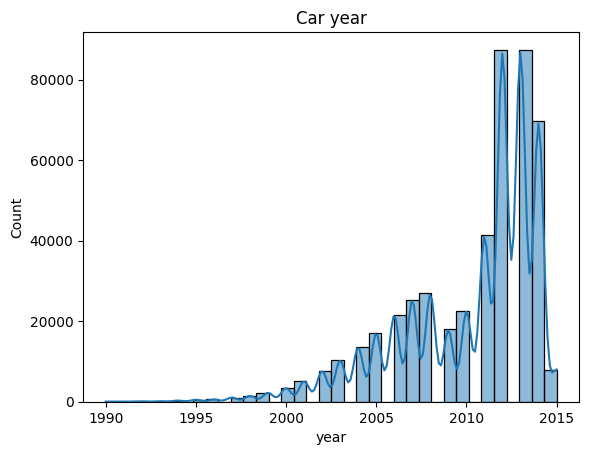

In [13]:
sns.histplot(df, stat= 'count', x='year', binwidth=0.7, kde=True,)
plt.title('Car year')
plt.show()

La mayor cantidad de autos vendidos en este periodo fueron fabricados entre el 2010 y el 2015.

*The majority of cars sold in this period were manufactured between 2010 and 2015.*

### Brands

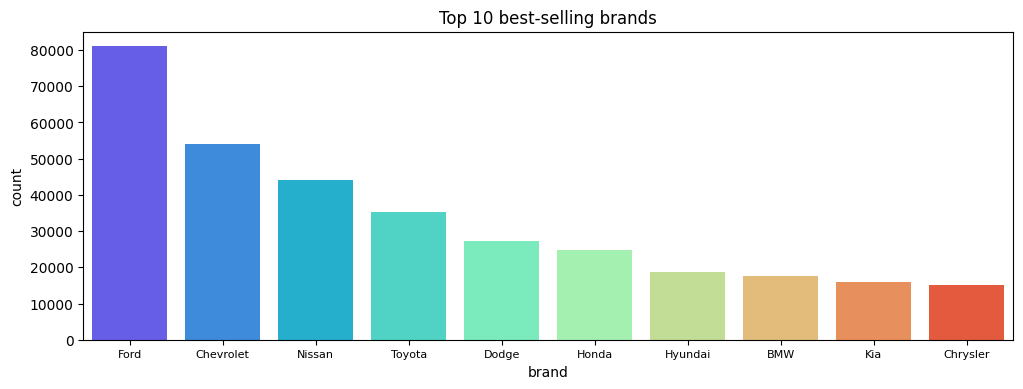

In [14]:
plt.figure(figsize=(12,4))
sort_brands = df.brand.value_counts().head(10)
sns.barplot(sort_brands, palette='rainbow')
plt.title('Top 10 best-selling brands')
plt.xticks(fontsize=8)
plt.show()

Ford es la marca de autos más vendida en este periodo.

*Ford is the best-selling car brand during this period.*

### Models

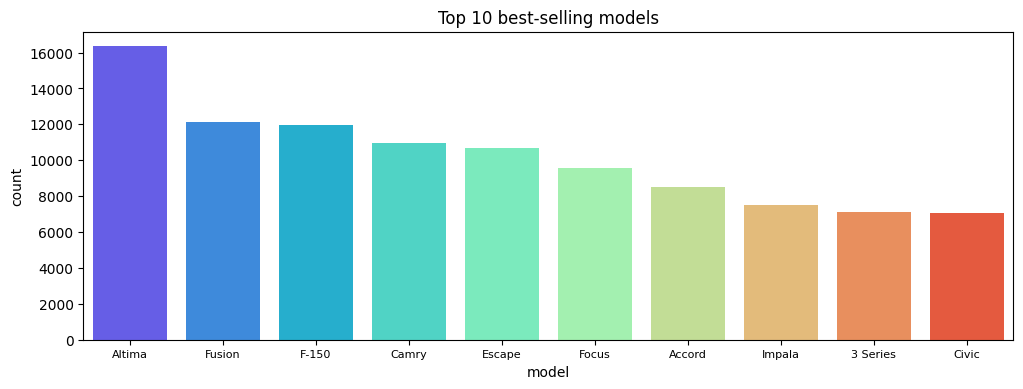

In [110]:
plt.figure(figsize=(12,4))
top_models = df.model.value_counts().head(10)
sns.barplot(top_models, palette='rainbow')
plt.title('Top 10 best-selling models')
plt.xticks(fontsize=8)
plt.show()

El modelo más vendido es el Nissan Altima, seguido por el Ford Fusion.

*The best-selling model is the Nissan Altima, followed by the Ford Fusion.*

### Body

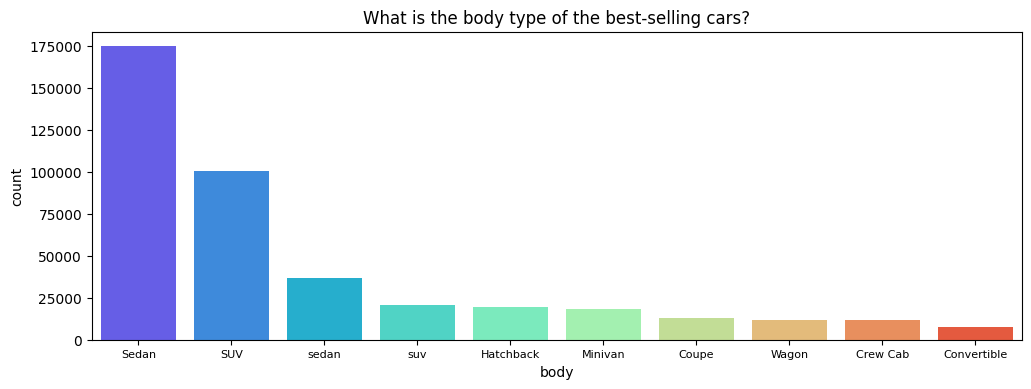

In [111]:
top_body = df.body.value_counts().head(10)
plt.figure(figsize=(12,4))
sns.barplot(top_body, palette='rainbow')
plt.title('What is the body type of the best-selling cars?')
plt.xticks(fontsize=8)
plt.show()

### Transmission

In [17]:
trans = df['transmission'].value_counts()

In [18]:
df['transmission'].value_counts()

transmission
automatic    455963
manual        16362
Name: count, dtype: int64

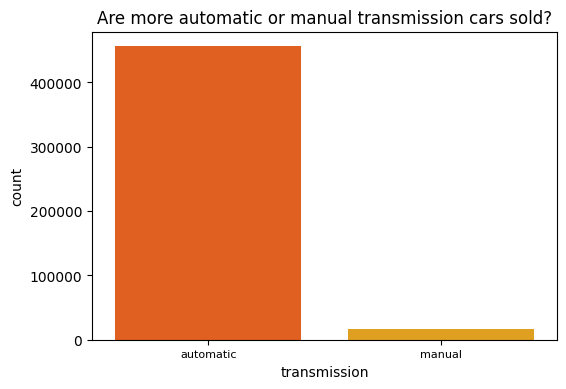

In [19]:
plt.figure(figsize=(6,4))
sns.barplot(trans)
sns.barplot(data=trans, palette='autumn', width=0.8)
plt.title('Are more automatic or manual transmission cars sold?')
plt.xticks(fontsize=8)
plt.show()

Vemos que la mayoría de los autos vendidos son automáticos.

*We see that the majority of sold cars are automatics.*

### State

In [20]:
df_state = df['state'].value_counts().reset_index()
df_state.columns = ['state', 'count']

In [21]:
df_state['state'] = df_state['state'].str.upper()

In [22]:

fig = px.choropleth(
    df_state,
    locationmode='USA-states',
    locations='state',
    color='count',
    scope='usa',
    title='Car Sales by States',
    color_continuous_scale=px.colors.sequential.Plasma,
    height=500,
    width=600
)

fig.show()


Los estados de Florida y California son donde se han vendido más autos en este periodo.

*The states of Florida and California are where the most cars have been sold in this period.*

### Condition

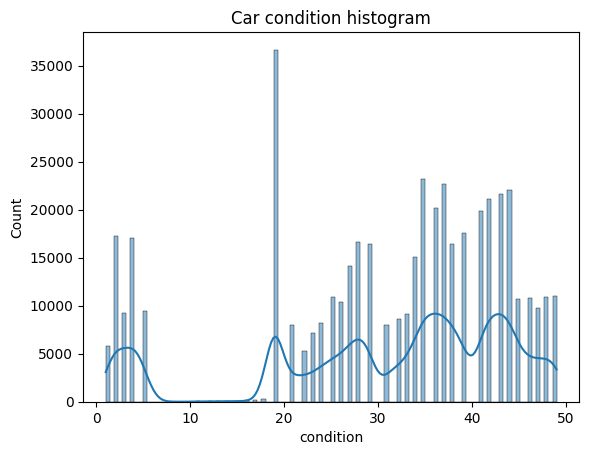

In [23]:
sns.histplot(df, x='condition', kde=True)
plt.title('Car condition histogram')
plt.show()

La columna "condition" es una calificación general sobre el estado del auto. No sabemos cuales son los factores que definen estos puntajes.

*The "condition" column is a general rating of the car's state. We don't know the specific factors that define these scores.*

### Kilometres

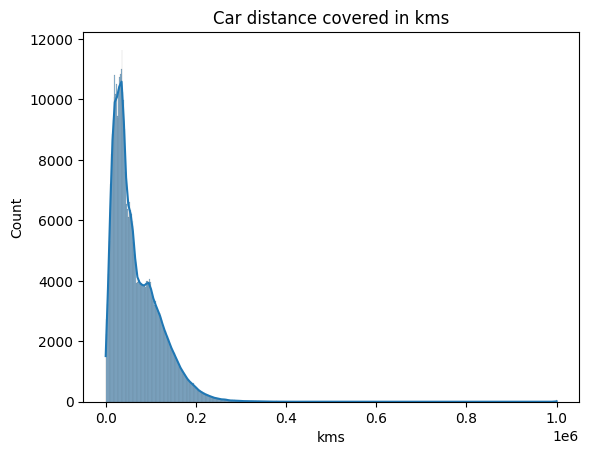

In [24]:
sns.histplot(df, x='kms', kde=True)
plt.title('Car distance covered in kms')
plt.show()

Vemos una distribución con cola hacia la derecha: muchos autos nuevos o con pocos kms recorrido.


*We observe a right-skewed distribution: many cars are new or have low mileage.*

### Color

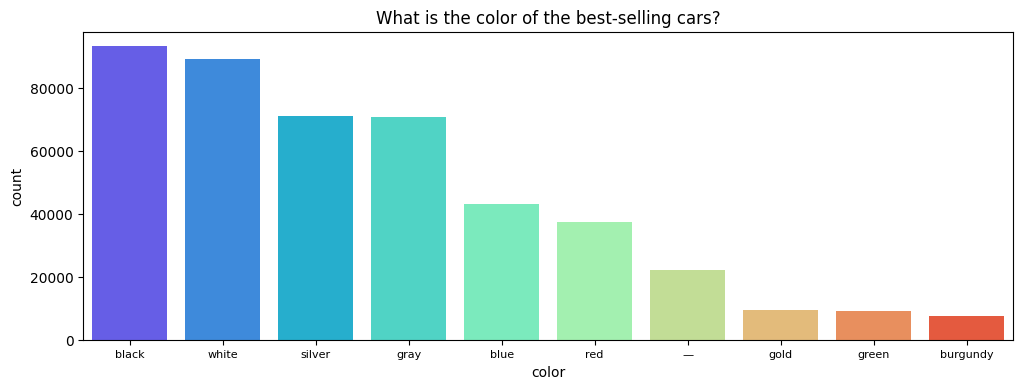

In [25]:
top_color = df.color.value_counts().head(10)
plt.figure(figsize=(12,4))
sns.barplot(top_color, palette='rainbow')
plt.title('What is the color of the best-selling cars?')
plt.xticks(fontsize=8)
plt.show()

Blanco y negro los colores preferidos por los compradores.

**White and black are the preferred colors by buyers.**

In [26]:
df['color'] = df['color'].replace('—',"no info")

### Interior color

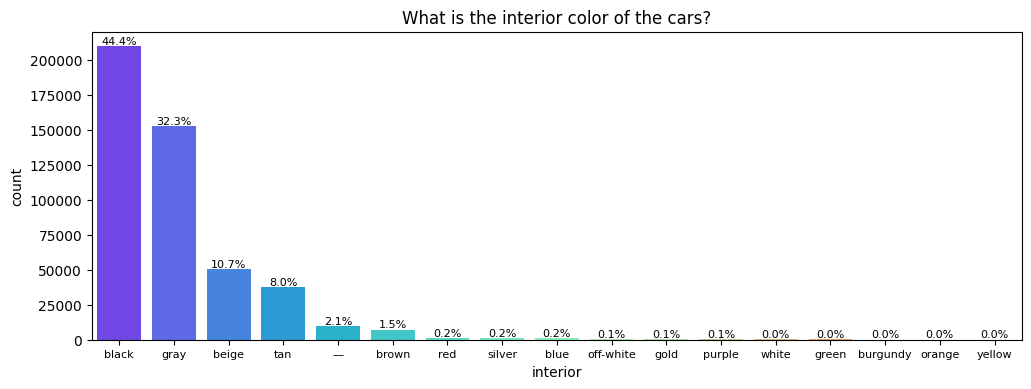

In [27]:

interior_color = df['interior'].value_counts()
total_cars = len(df)

plt.figure(figsize=(12, 4))
ax = sns.barplot(interior_color, palette='rainbow')

plt.title('What is the interior color of the cars?')
plt.xticks(fontsize=8)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{(height/total_cars)*100:.1f}%', ha="center", va="bottom", fontsize=8)

plt.show()


Negro y gris: los colores del interior de los autos más vendidos.

*Black and gray are the interior colors of the best-selling cars.*

In [28]:
df['interior'] = df['interior'].replace('—',"no info")

### Seller companies

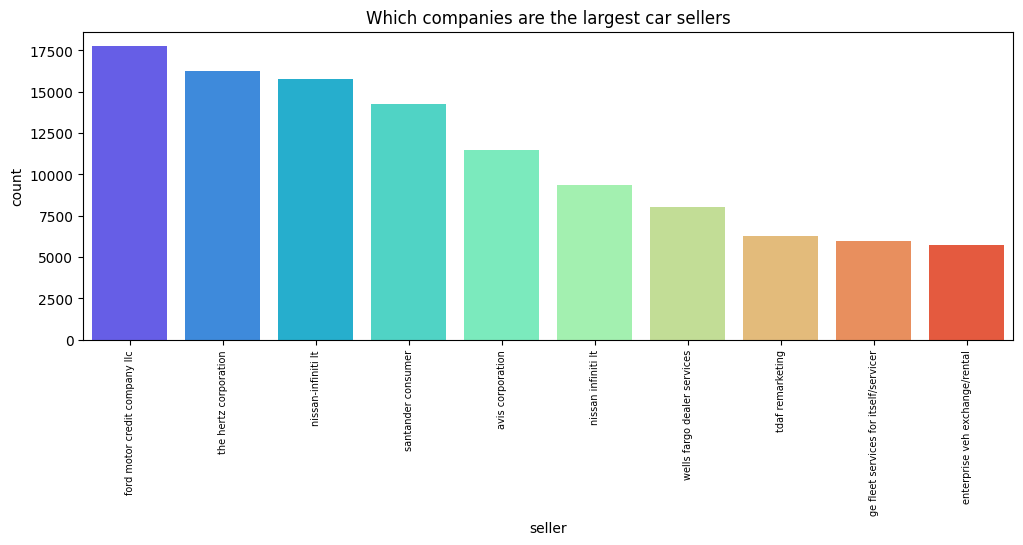

In [29]:
sellers = df.seller.value_counts().head(10)
plt.figure(figsize=(12,4))
sns.barplot(sellers, palette='rainbow')
plt.title('Which companies are the largest car sellers')
plt.xticks(fontsize=7, rotation= 90)
plt.show()

### Manheim Market Report prices

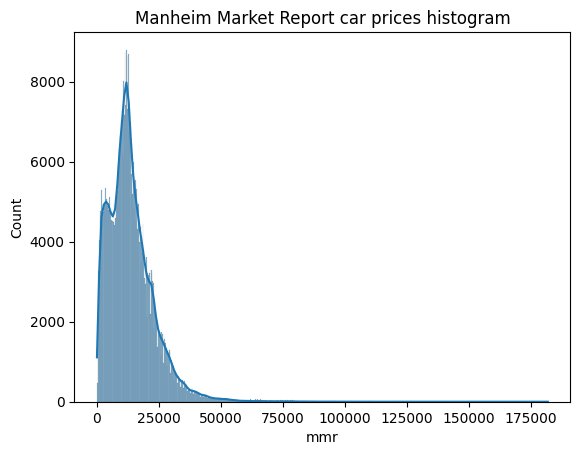

In [30]:
sns.histplot(df, x='mmr', kde=True)
plt.title('Manheim Market Report car prices histogram')
plt.show()

### Car selling prices

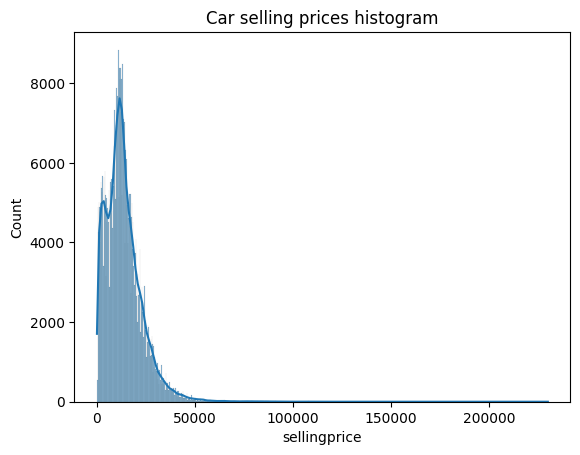

In [31]:
sns.histplot(df, x='sellingprice', kde=True)
plt.title('Car selling prices histogram')
plt.show()

Notese la similitude de ambos histogramas.

*Note the similarity of both histograms.*



### Sale dates

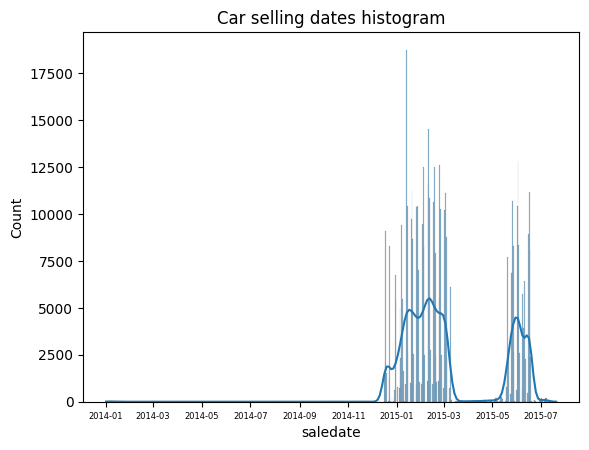

In [32]:
sns.histplot(df, x='saledate', kde=True)
plt.title('Car selling dates histogram')
plt.xticks(fontsize=6)
plt.show()

Observamos una gran cantidad de ventas entre enero y marzo del 2015 y luego entre mayo y julio. Esto podría ser simplemente una deficiencia en la recolección de datos, aunque para estar más seguros deberiamos profundizar en que eventos económicos, sociales, etc. ocurrieron en esas fechas.

*We observe a large number of sales between January and March 2015, followed by another peak between May and July. This could simply be a data collection deficiency, although to be more certain, we should delve into what economic, social, or other events occurred during those dates.*

## Z-scores and outliers

### Boxplots

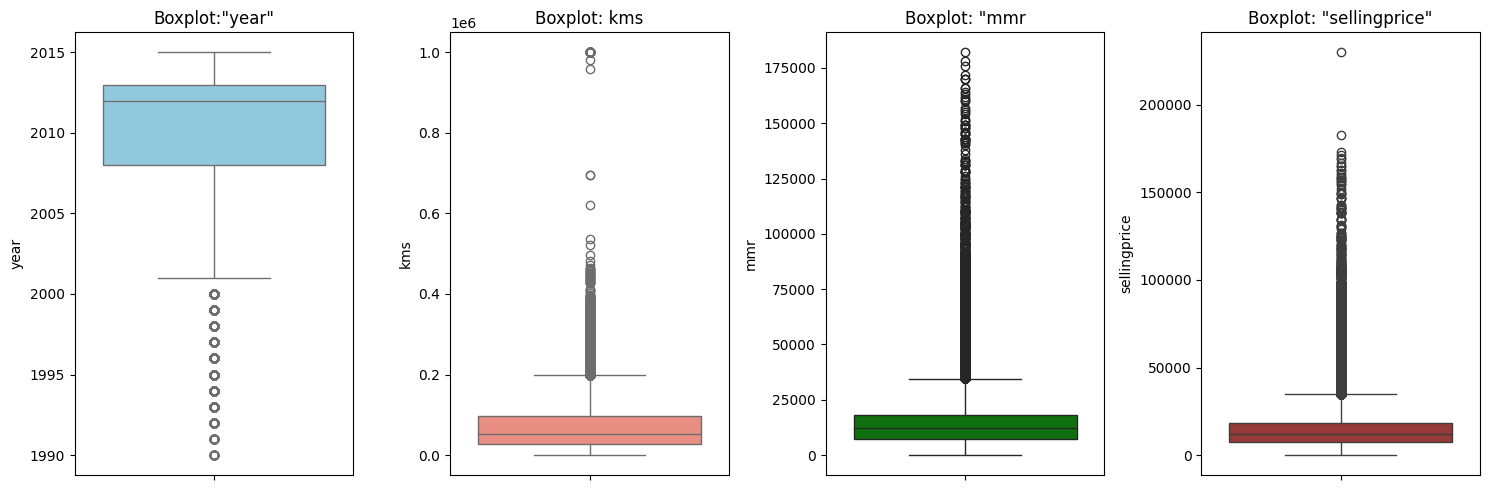

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

# Boxplot 1
sns.boxplot(df['year'], ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot:"year"')

# Boxplot 2
sns.boxplot(df['kms'], ax=axes[1], color='salmon')
axes[1].set_title('Boxplot: kms')

# Boxplot 3
sns.boxplot(df['mmr'], ax=axes[2], color='green')
axes[2].set_title('Boxplot: "mmr')


# Boxplot 4
sns.boxplot(df['sellingprice'], ax=axes[3], color='brown')
axes[3].set_title('Boxplot: "sellingprice"')

# Ajustar el diseño
plt.tight_layout()
plt.show()

A partir de estas gráficas de caja y bigotes, observamos una gran cantidad de valores atípicos.

*From these boxplots, we observe a large number of outliers.*

### z_scores

Crearemos un df que contenga los valores normalizados según el método de Z-Score para poder realizar más visualizaciones de estos valores atípicos.

*We will create a DataFrame containing the values normalized according to the Z-Score method to further visualize these outliers.*

In [34]:
df1 = df.copy()

In [35]:
df1['z_score_year'] = ((df1['year'] - df1['year'].mean())/df1['year'].std())
df1['z_score_kms'] = ((df1['kms'] - df1['kms'].mean())/df1['kms'].std())
df1['z_score_mmr'] = ((df1['mmr'] - df1['mmr'].mean())/df1['mmr'].std())
df1['z_score_condition'] = ((df1['condition'] - df1['condition'].mean())/df1['condition'].std())
df1['z_score_selling_price'] = ((df1['sellingprice'] - df1['sellingprice'].mean())/df1['sellingprice'].std())

In [36]:
outliers_year = df1[(df1['z_score_year'] > 3) | (df1['z_score_year'] < -3)]
outliers_kms = df1[(df1['z_score_kms'] > 3) | (df1['z_score_kms'] < -3)]
outliers_mmr = df1[(df1['z_score_mmr'] > 3) | (df1['z_score_mmr'] < -3)]
outliers_condition = df1[(df1['z_score_condition'] > 3) | (df1['z_score_condition'] < -3)]
outliers_selling_price = df1[(df1['z_score_selling_price'] > 3) | (df1['z_score_selling_price'] < -3)]

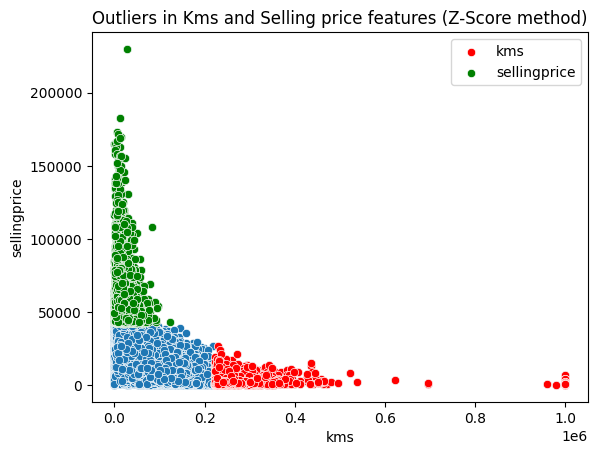

In [37]:
# Scatter plot for the entire DataFrame
sns.scatterplot(data=df1, x='kms', y='sellingprice')

# Scatter plot for outliersFide with red color
sns.scatterplot(data=outliers_kms, x='kms', y='sellingprice', c='red', label='kms')
sns.scatterplot(data=outliers_selling_price, x='kms', y='sellingprice', c='green', label='sellingprice')
plt.title('Outliers in Kms and Selling price features (Z-Score method)')
plt.legend()


plt.show()

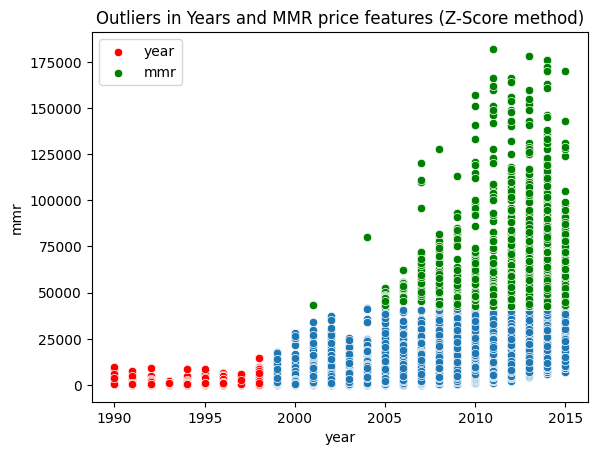

In [38]:
# Scatter plot for the entire DataFrame
sns.scatterplot(data=df1, x='year', y='mmr')

# Scatter plot for outliersFide with red color
sns.scatterplot(data=outliers_year, x='year', y='mmr', c='red', label='year')
sns.scatterplot(data=outliers_mmr, x='year', y='mmr', c='green', label='mmr')
plt.title('Outliers in Years and MMR price features (Z-Score method)')
plt.legend()


plt.show()

### LOF (local outlier factor)

El LOF se basa en el concepto de densidad local. Para cada punto de datos *p*, la densidad local se calcula como la inversa de la distancia promedio a sus *k* vecinos más cercanos. Cuanto más cercanos estén los vecinos de *p*, mayor será su densidad local.

*The Local Outlier Factor (LOF) is based on the concept of local density. For each data point \( p \), the local density is calculated as the inverse of the average distance to its \( k \) nearest neighbors. The closer \( p \)'s neighbors are, the higher its local density will be.*

In [39]:
df2 = df.copy()

In [40]:
df2 = df2.dropna().reset_index()

In [41]:
numerical_columns = df2.select_dtypes(include='number').columns

In [42]:
# Crear el modelo LOF
lof_model = LocalOutlierFactor(contamination=0.05)
# Ajustar el modelo a los datos numéricos
df2['outlier_lof'] = lof_model.fit_predict(df2[numerical_columns])

In [43]:
#Cantidad de outliers detectados
sum(df2['outlier_lof'] == -1)

23617

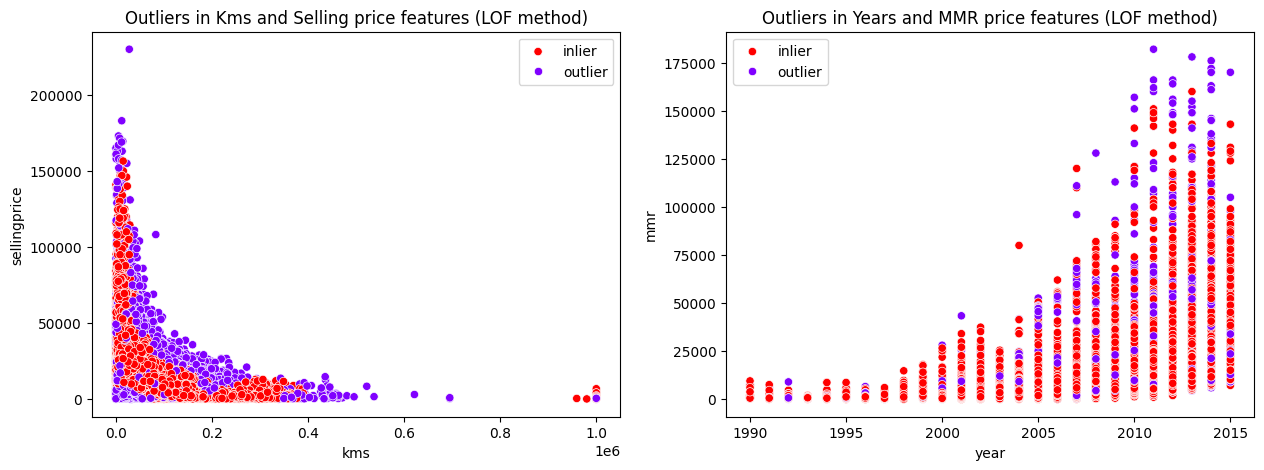

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# plot 1
sns.scatterplot(data=df2, x='kms', y='sellingprice', hue='outlier_lof', palette='rainbow',ax=axes[0])
axes[0].set_title('Outliers in Kms and Selling price features (LOF method)')
axes[0].legend(labels=['inlier','outlier'])

#plot 2
sns.scatterplot(data=df2, x='year', y='mmr', hue='outlier_lof', palette='rainbow' ,ax=axes[1])
axes[1].set_title('Outliers in Years and MMR price features (LOF method)')
axes[1].legend(labels=['inlier','outlier'])
plt.show()

Nótese la diferencia de apreciación entre los diferentes métodos, sobre cuales valores deben ser considerados outliers y cuales no.

### Isolation Forest

Isolation Forest (iForest) es un algoritmo de detección de anomalías basado en árboles que se utiliza para identificar observaciones atípicas (outliers) en conjuntos de datos.

Los árboles de Isolation Forest son árboles de decisión poco profundos (shallow). Esto significa que cada árbol se desarrolla solo hasta cierta profundidad máxima (generalmente determinada por hiperparámetros como la altura máxima del árbol o el número máximo de nodos).
Las anomalías tienden a estar más cerca de la raíz del árbol porque son más fáciles de aislar con menos divisiones. Por lo tanto, las observaciones atípicas suelen terminar más arriba en los árboles (cerca de la raíz) y requieren menos divisiones para ser aisladas.

*Isolation Forest (iForest) is an anomaly detection algorithm based on trees used to identify outlier observations in datasets.*

*Isolation Forest constructs shallow decision trees, meaning each tree is developed only up to a certain maximum depth (typically determined by hyperparameters like maximum tree height or maximum number of nodes). Anomalies tend to be closer to the root of the tree because they are easier to isolate with fewer splits. Therefore, outlier observations often end up nearer to the root of the trees and require fewer splits to be isolated.*

In [45]:
# Seleccionar columnas numéricas
numerical_columns = df2.select_dtypes(include='number').columns

# Crear el modelo Isolation Forest
if_model = IsolationForest(contamination=0.05)  # Puedes ajustar el parámetro de contaminación según tus necesidades

# Ajustar el modelo a los datos numéricos
df2['outlier_if'] = if_model.fit_predict(df2[numerical_columns])

In [46]:
#Cantidad de outliers detectados
sum(df2['outlier_if'] == -1)

23617

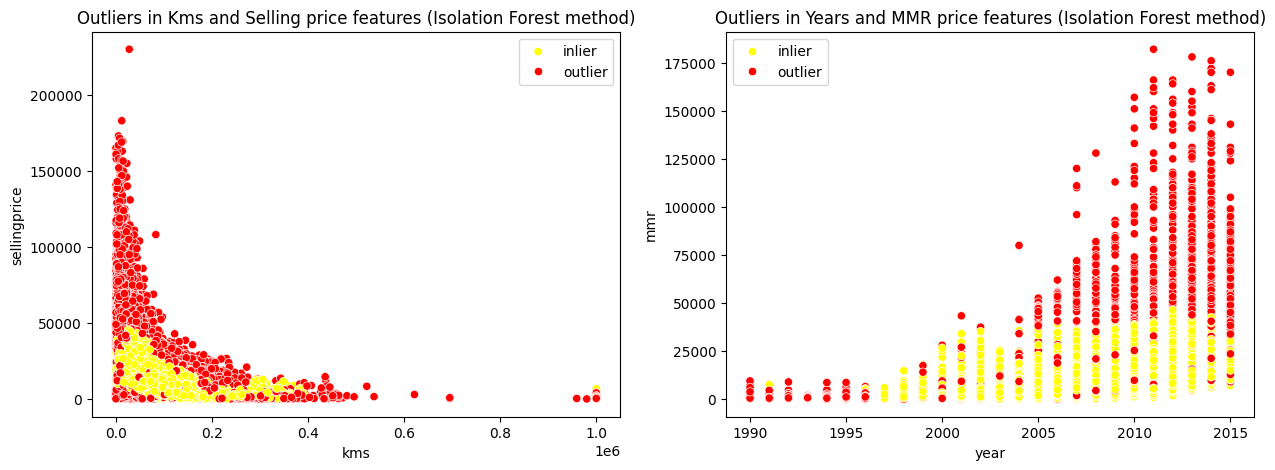

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Boxplot 1
sns.scatterplot(data=df2, x='kms', y='sellingprice', hue='outlier_if', palette='autumn',ax=axes[0])
axes[0].set_title('Outliers in Kms and Selling price features (Isolation Forest method)')
axes[0].legend(labels=['inlier','outlier'])

# Boxplot 2
sns.scatterplot(data=df2, x='year', y='mmr', hue='outlier_if', palette='autumn' ,ax=axes[1])
axes[1].set_title('Outliers in Years and MMR price features (Isolation Forest method)')
axes[1].legend(labels=['inlier','outlier'])
plt.show()

### Quitamos outliers en nuevos df/ *Removing outliers in new dataframes*

Crearemos distintos dataframes sin datos atípicos utilizando los tres métodos utilizados.

*We will create different dataframes without outliers using the three methods applied.*

In [48]:
Outliers_Z_score = df1.loc[outliers_year.index.union(outliers_kms.index).union(outliers_mmr.index).union(outliers_selling_price.index).union(outliers_condition.index)].reset_index()


In [49]:
Outliers_Z_score.shape

(14468, 22)

In [50]:
Outliers_Z_score

index  year          brand                model  \
0           4  2014            BMW  6 Series Gran Coupe   
1           6  2014            BMW                   M5   
2          10  2014           Audi                   A6   
3          19  2014            BMW             6 Series   
4          24  2014            BMW             6 Series   
...       ...   ...            ...                  ...   
14463  558777  2012       Maserati         Quattroporte   
14464  558791  2012           Ford      Transit Connect   
14465  558807  2014  Mercedes-Benz              E-Class   
14466  558816  2013  Mercedes-Benz              G-Class   
14467  558824  2013           Audi                   S5   

                        trim         body transmission                vin  \
0                       650i        Sedan    automatic  wba6b2c57ed129731   
1                       Base        Sedan    automatic  wbsfv9c51ed593089   
2      3.0T Prestige quattro        Sedan    automatic  wauhgafc0en062916   
3                       650i  Convertible    automatic  wbayp9c53ed169260   
4                       650i  Convertible    automatic  wbayp9c57ed169262   
...                      ...          ...          ...                ...   
14463                      S        sedan    automatic  zam39jka1c0060738   
14464              Wagon XLT      Minivan    automatic  nm0ks9bnxct078155   
14465         E63 AMG 4MATIC        Sedan    automatic  wddhf9cb9ea917688   
14466                G63 AMG          suv    automatic  wdcyc7df4dx207385   
14467   Premium Plus quattro  convertible    automatic  waucgafh6dn005382   

      state  condition  ...  interior                                  seller  \
0        ca       43.0  ...     black  financial services remarketing (lease)   
1        ca       34.0  ...     black                   the hertz corporation   
2        ca       48.0  ...     black                       desert auto trade   
3        ca       34.0  ...     black                   the hertz corporation   
4        ca       38.0  ...     black                   the hertz corporation   
...     ...        ...  ...       ...                                     ...   
14463    ga       39.0  ...   no info              maserati north america inc   
14464    mn       27.0  ...      gray                    saxon fleet services   
14465    ca       45.0  ...     black                   the hertz corporation   
14466    fl        5.0  ...     black                              fields bmw   
14467    fl        5.0  ...     black                           prestige audi   

            mmr sellingprice    saledate  z_score_year z_score_kms  \
0       66000.0      67000.0  2014-12-18      0.991332   -1.233370   
1       69000.0      65000.0  2014-12-17      0.991332   -0.996518   
2       47300.0      49750.0  2014-12-16      0.991332   -1.006703   
3       68000.0      67200.0  2014-12-17      0.991332   -1.114424   
4       67000.0      65000.0  2015-01-06      0.991332   -1.077516   
...         ...          ...         ...           ...         ...   
14463   53300.0      40250.0  2015-06-23      0.468066   -0.862131   
14464   10100.0       3000.0  2015-07-07      0.468066    3.761356   
14465   64000.0      69500.0  2015-07-07      0.991332   -0.946941   
14466  104000.0     105000.0  2015-07-06      0.729699   -0.768253   
14467   43900.0      42000.0  2015-07-08      0.729699   -0.896113   

       z_score_mmr  z_score_condition  z_score_selling_price  
0         5.472271           0.920143               5.545543  
1         5.786993           0.242783               5.337492  
2         3.510505           1.296455               3.751104  
3         5.682085           0.242783               5.566348  
4         5.577178           0.543832               5.337492  
...            ...                ...                    ...  
14463     4.139949           0.619094               2.762862  
14464    -0.392045          -0.284053              -1.11

Creating a df for LOF

In [51]:
outliers_off_LOF_method = df2[df2['outlier_lof'] != -1]

In [52]:
outliers_off_LOF_method.shape

(448708, 19)

Creating a df for Isolation Forest

In [53]:
# Filtrar los outliers
outliers_off_IF_method = df2[df2['outlier_if'] != -1]

In [54]:
outliers_off_IF_method.shape

(448708, 19)

## Relación entre variables/ *Relationship between variables*

### Selling_price vs. Year

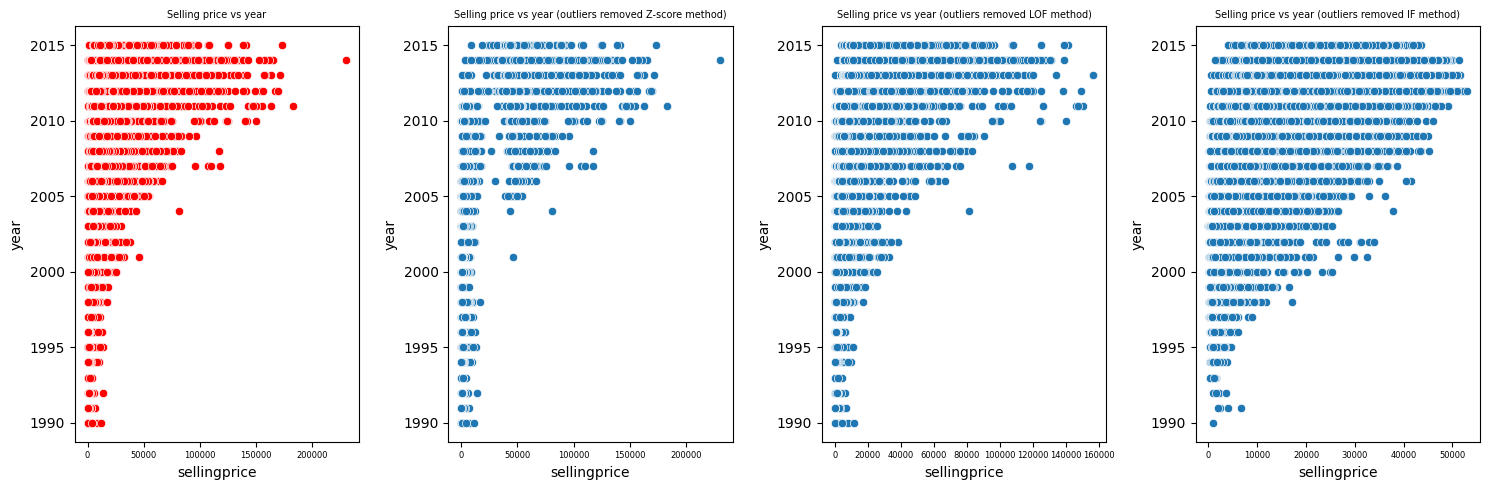

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

sns.scatterplot(df, x='sellingprice', y='year',ax=axes[0], color='red')
axes[0].set_title('Selling price vs year', fontsize=7)

sns.scatterplot(Outliers_Z_score, x='sellingprice', y='year' ,ax=axes[1])
axes[1].set_title('Selling price vs year (outliers removed Z-score method)', fontsize=7)

sns.scatterplot(outliers_off_LOF_method, x='sellingprice', y='year' ,ax=axes[2])
axes[2].set_title('Selling price vs year (outliers removed LOF method)', fontsize=7)

sns.scatterplot(outliers_off_IF_method, x='sellingprice', y='year' ,ax=axes[3])
axes[3].set_title('Selling price vs year (outliers removed IF method)', fontsize=7)

# Configurar el tamaño de las etiquetas del eje x
for ax in axes.flatten():
    ax.tick_params(axis='x', labelsize=6)

# Mostrar los subplots
plt.tight_layout()
plt.show()

### Average price by years

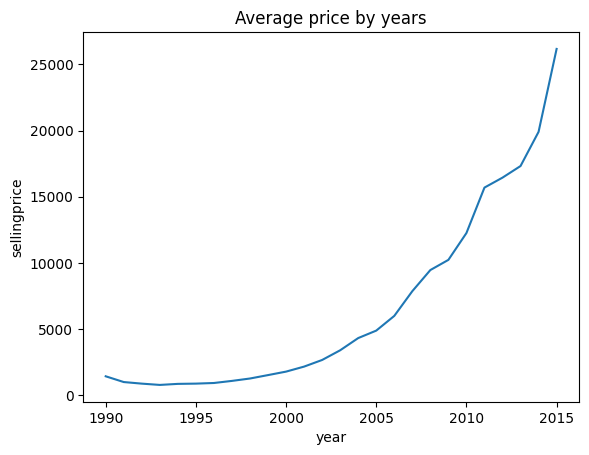

In [113]:
# Group by 'year' and calculate mean for numeric columns
mean_sell = df.groupby('year')['sellingprice'].mean()

mean_sell = pd.DataFrame(mean_sell).reset_index()

sns.lineplot(mean_sell, x = "year", y = "sellingprice")
plt.title("Average price by years")
plt.show()

Observamos una relación con tendencia lineal: a medida que pasan los años aumenta el precio de los automóviles.

*We observe a linear trend relationship: as the years pass, the price of cars increases.*

### Kms vs. Selling price

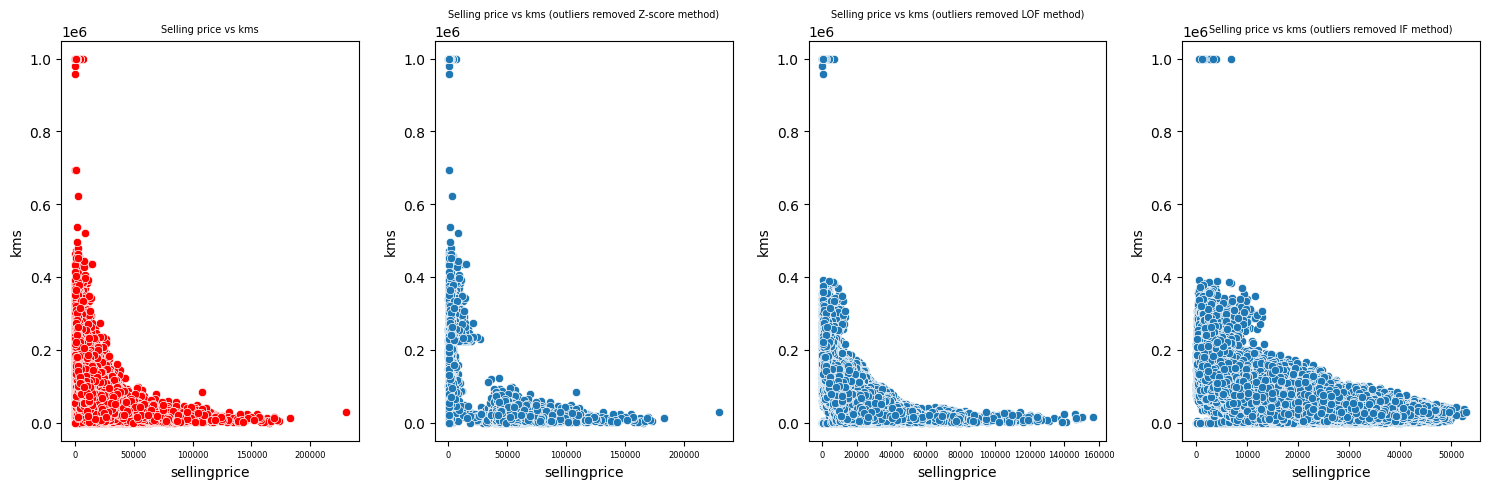

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

sns.scatterplot(df, x='sellingprice', y='kms',ax=axes[0], color='red')
axes[0].set_title('Selling price vs kms', fontsize=7)

sns.scatterplot(Outliers_Z_score, x='sellingprice', y='kms' ,ax=axes[1])
axes[1].set_title('Selling price vs kms (outliers removed Z-score method)', fontsize=7)

sns.scatterplot(outliers_off_LOF_method, x='sellingprice', y='kms' ,ax=axes[2])
axes[2].set_title('Selling price vs kms (outliers removed LOF method)', fontsize=7)

sns.scatterplot(outliers_off_IF_method, x='sellingprice', y='kms' ,ax=axes[3])
axes[3].set_title('Selling price vs kms (outliers removed IF method)', fontsize=7)

# Configurar el tamaño de las etiquetas del eje x
for ax in axes.flatten():
    ax.tick_params(axis='x', labelsize=6)

# Mostrar los subplots
plt.tight_layout()
plt.show()

### animated graph

In [67]:
# Ordenamos el DataFrame por el año de forma ascendente
Outliers_Z_score_sorted = Outliers_Z_score.sort_values('year')

px.scatter(Outliers_Z_score_sorted,
           x="mmr",
           y="sellingprice",
           size="mmr",
           color="brand",
           template="plotly_dark",
           color_discrete_sequence = px.colors.qualitative.Prism,
           animation_frame="year",
           animation_group="brand",
           range_x=[df['mmr'].min(), df['mmr'].max()],
           range_y=[df['sellingprice'].min(), df['sellingprice'].max()],
           title="Selling price and MMR price throught the years in USA",
           labels={"mmr": "Mmr price", "sellingprice" :"Selling price",
                  "brand" : "Brand"})


### Mmr vs Selling prices

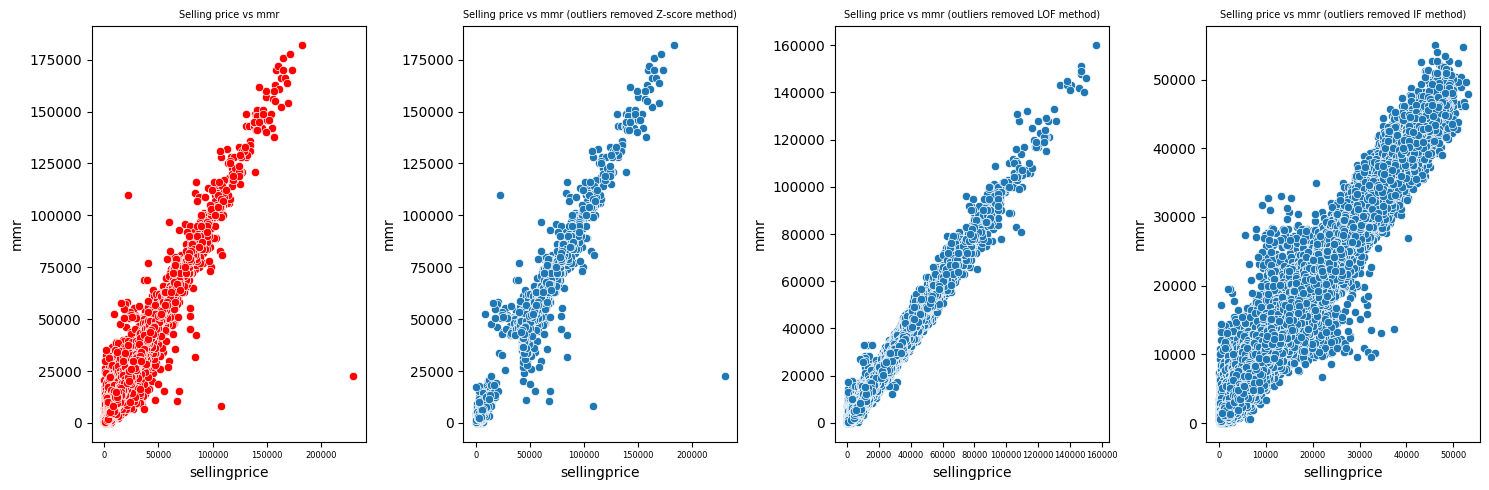

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

sns.scatterplot(df, x='sellingprice', y='mmr',ax=axes[0], color='red')
axes[0].set_title('Selling price vs mmr', fontsize=7)

sns.scatterplot(Outliers_Z_score, x='sellingprice', y='mmr' ,ax=axes[1])
axes[1].set_title('Selling price vs mmr (outliers removed Z-score method)', fontsize=7)

sns.scatterplot(outliers_off_LOF_method, x='sellingprice', y='mmr' ,ax=axes[2])
axes[2].set_title('Selling price vs mmr (outliers removed LOF method)', fontsize=7)

sns.scatterplot(outliers_off_IF_method, x='sellingprice', y='mmr' ,ax=axes[3])
axes[3].set_title('Selling price vs mmr (outliers removed IF method)', fontsize=7)

# Configurar el tamaño de las etiquetas del eje x
for ax in axes.flatten():
    ax.tick_params(axis='x', labelsize=6)

# Mostrar los subplots
plt.tight_layout()
plt.show()

Volvemos a observar la relación lineal entre ambas características.

### Condition vs selling prices

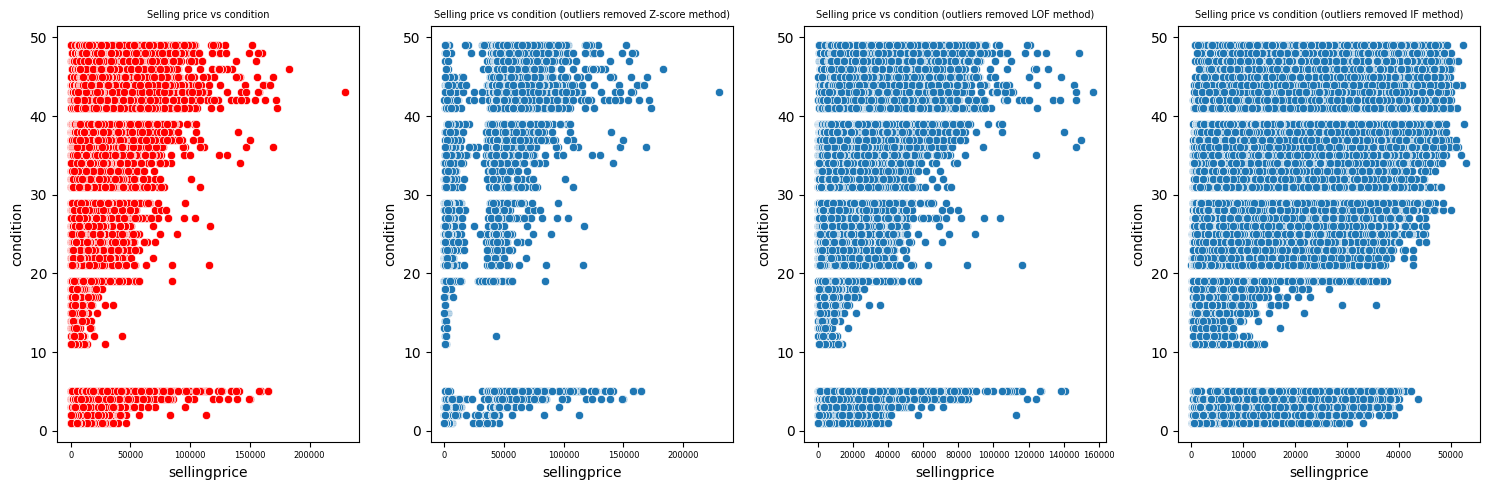

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

sns.scatterplot(df, x='sellingprice', y='condition',ax=axes[0], color='red')
axes[0].set_title('Selling price vs condition', fontsize=7)

sns.scatterplot(Outliers_Z_score, x='sellingprice', y='condition' ,ax=axes[1])
axes[1].set_title('Selling price vs condition (outliers removed Z-score method)', fontsize=7)

sns.scatterplot(outliers_off_LOF_method, x='sellingprice', y='condition' ,ax=axes[2])
axes[2].set_title('Selling price vs condition (outliers removed LOF method)', fontsize=7)

sns.scatterplot(outliers_off_IF_method, x='sellingprice', y='condition' ,ax=axes[3])
axes[3].set_title('Selling price vs condition (outliers removed IF method)', fontsize=7)

# Configurar el tamaño de las etiquetas del eje x
for ax in axes.flatten():
    ax.tick_params(axis='x', labelsize=6)

# Mostrar los subplots
plt.tight_layout()
plt.show()

### Condition vs kms

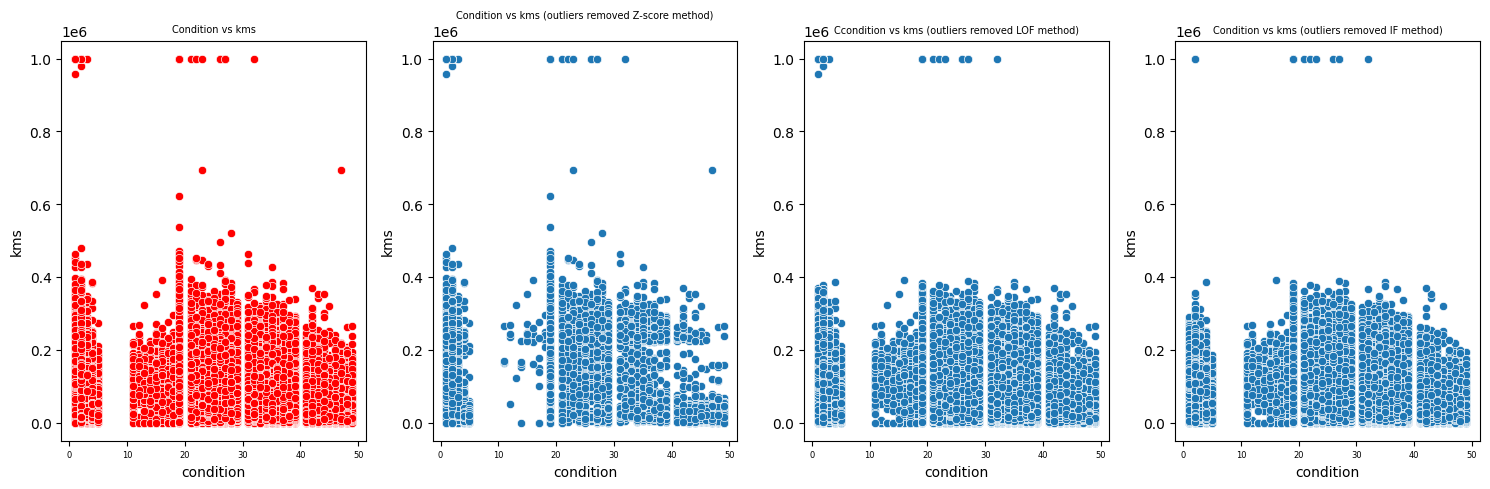

In [70]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

sns.scatterplot(df, x='condition', y='kms',ax=axes[0], color='red')
axes[0].set_title('Condition vs kms', fontsize=7)

sns.scatterplot(Outliers_Z_score, x='condition', y='kms' ,ax=axes[1])
axes[1].set_title('Condition vs kms (outliers removed Z-score method)', fontsize=7)

sns.scatterplot(outliers_off_LOF_method, x='condition', y='kms' ,ax=axes[2])
axes[2].set_title('Ccondition vs kms (outliers removed LOF method)', fontsize=7)

sns.scatterplot(outliers_off_IF_method, x='condition', y='kms' ,ax=axes[3])
axes[3].set_title('Condition vs kms (outliers removed IF method)', fontsize=7)

# Configurar el tamaño de las etiquetas del eje x
for ax in axes.flatten():
    ax.tick_params(axis='x', labelsize=6)

# Mostrar los subplots
plt.tight_layout()
plt.show()

### Correlation heatmap

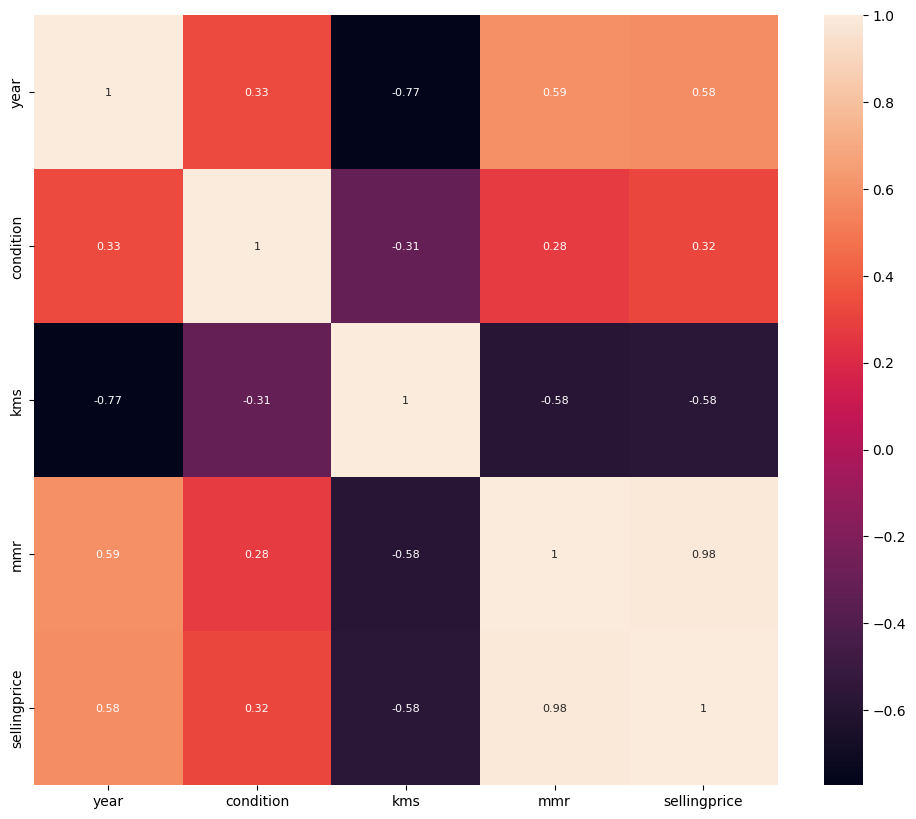

In [75]:
#sacamos las correlaciones
num = df.select_dtypes(include=[np.number]).columns
df_corr = df[num].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr, annot=True,annot_kws={"size": 8})
plt.show()

La razón por la cual la columa de precios de MMR deberá ser removida si queremos predecir en un futuro el precio de venta es que esta variable esta totalmente correlacionada: 98%. Tener una columna así implica directamente tener la solución a nuestro problema en el conjunto de variables independientes.

*The reason why the MMR (Manheim Market Report) price column should be removed if we want to predict future selling prices is that this variable is highly correlated: 98%. Having such a column directly implies having the solution to our problem within the set of independent variables.*

# Filtros

Pongamos la lupa en los autos de las marcas Ford y Chevrolet. Tienen alguna característica en particular? Porque son los autos más vendidos? Tienen precios más baratos?

*Let's take a closer look at the cars from the Ford and Chevrolet brands. Do they have any particular features? Why are they the best-selling cars? Are they priced lower?*

## Chevrolet vs. Ford

In [76]:
# fitramos los autos que corresponden a la marca FORD y CHEVROLET
Ford_chev = df[df['brand'].isin(["Ford", "Chevrolet"])]

### Barplot: sales amount

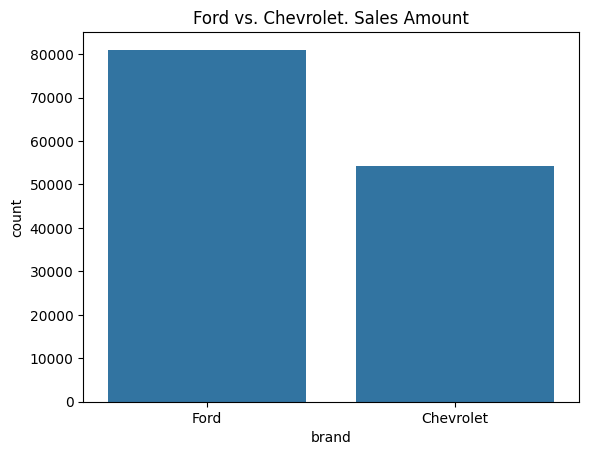

In [77]:
# You get the value counts
brand_counts = Ford_chev['brand'].value_counts().reset_index()
brand_counts.columns = ['brand', 'count']

# Now, brand_counts is a DataFrame with two columns: 'brand' and 'count'

sns.barplot(data=brand_counts, x='brand', y='count')
plt.title("Ford vs. Chevrolet. Sales Amount")
plt.show()

### Selling price histogram

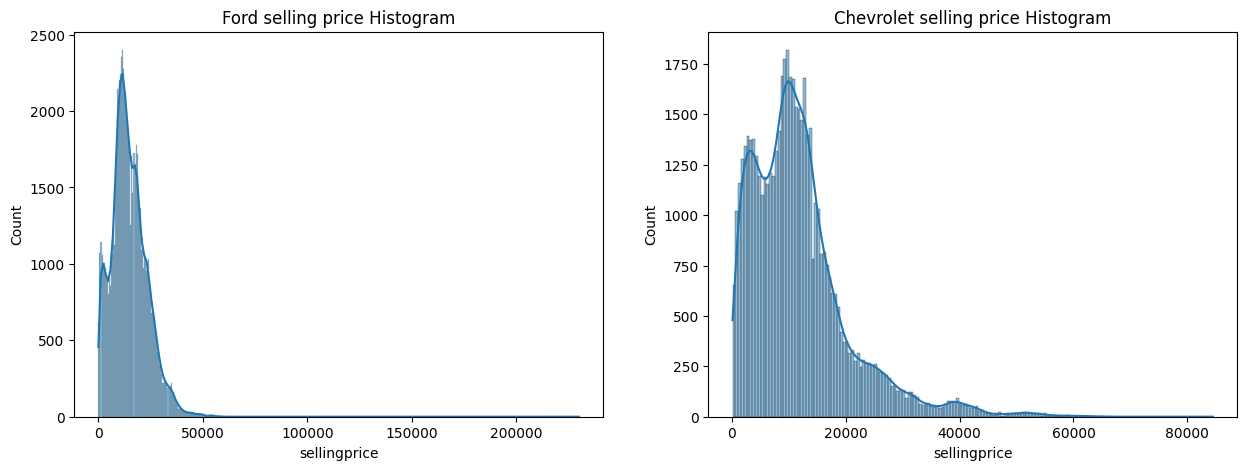

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# plot 1
sns.histplot(data=Ford_chev[Ford_chev['brand'].isin(["Ford"])], x='sellingprice', kde = True ,palette='rainbow',ax=axes[0])
axes[0].set_title('Ford selling price Histogram')

#plot 2
sns.histplot(data=Ford_chev[Ford_chev['brand'].isin(["Chevrolet"])], x='sellingprice', kde = True, palette='rainbow',ax=axes[1])
axes[1].set_title('Chevrolet selling price Histogram')

plt.show()

### Sales by date

In [79]:
#creamos df para contabilizar las ventas por fecha de Ford
n_sales_ford = Ford_chev[Ford_chev['brand'].isin(["Ford"])]['saledate'].value_counts().reset_index()
n_sales_ford.columns = ['saledate', 'count']

#creamos df para contabilizar las ventas por fecha de chevrolet

n_sales_chev = Ford_chev[Ford_chev['brand'].isin(["Chevrolet"])]['saledate'].value_counts().reset_index()
n_sales_chev.columns = ['saledate', 'count']

In [80]:
n_sales_ford['brand'] = 'Ford'
n_sales_chev['brand'] = 'Chevrolet'

# Combinar los DataFrames
combined_sales = pd.concat([n_sales_ford, n_sales_chev])

# Ordenando el DataFrame combinado por fecha para el gráfico
combined_sales['saledate'] = pd.to_datetime(combined_sales['saledate'])
combined_sales.sort_values('saledate', inplace=True)

# Convertir la fecha de inicio a formato datetime para asegurar compatibilidad
start_date = pd.to_datetime('2015-01-01')
Ford_chev_filtered = combined_sales[combined_sales['saledate'] >= start_date]

# Crear un lineplot con Plotly Express
fig = px.line(Ford_chev_filtered, x='saledate', y='count', color='brand',
              labels={'count': 'Number of Sales', 'saledate': 'Sale Date'},
              title='Sales by Date for Ford and Chevrolet')

fig.show()

### Selling price vs kms

In [81]:
fig = px.scatter(Ford_chev, x="sellingprice", y="kms", color = "brand", symbol="brand",
                  marginal_x="histogram", marginal_y="histogram",
                 title="Selling price vs kms. Interactive scatterplot with marginal histograms")
fig.show()

### Correlation heatmap

In [84]:
#sacamos las correlaciones
# df_corr_ford = Ford_chev[Ford_chev['brand'].isin(["Ford"])[num]].corr()
# df_corr_chev = Ford_chev[Ford_chev['brand'].isin(["Chevrolet"])[num]].corr()


# Filter DataFrame for Ford and Chevrolet cars
ford_df = Ford_chev[Ford_chev['brand'] == 'Ford']
chevrolet_df = Ford_chev[Ford_chev['brand'] == 'Chevrolet']

# Select only numeric columns for correlation analysis
numeric_columns = ['year', 'condition', 'kms', 'mmr', 'sellingprice']

# Compute correlations for Ford cars
df_corr_ford = ford_df[numeric_columns].corr()

# Compute correlations for Chevrolet cars
df_corr_chev = chevrolet_df[numeric_columns].corr()


Correlation matrix for Ford cars:
                  year  condition       kms       mmr  sellingprice
year          1.000000   0.402828 -0.747159  0.604461      0.587908
condition     0.402828   1.000000 -0.371083  0.290004      0.332019
kms          -0.747159  -0.371083  1.000000 -0.585698     -0.576687
mmr           0.604461   0.290004 -0.585698  1.000000      0.971355
sellingprice  0.587908   0.332019 -0.576687  0.971355      1.000000

Correlation matrix for Chevrolet cars:
                  year  condition       kms       mmr  sellingprice
year          1.000000   0.181795 -0.742609  0.568969      0.556412
condition     0.181795   1.000000 -0.157854  0.190744      0.236045
kms          -0.742609  -0.157854  1.000000 -0.554312     -0.546089
mmr           0.568969   0.190744 -0.554312  1.000000      0.979955
sellingprice  0.556412   0.236045 -0.546089  0.979955      1.000000


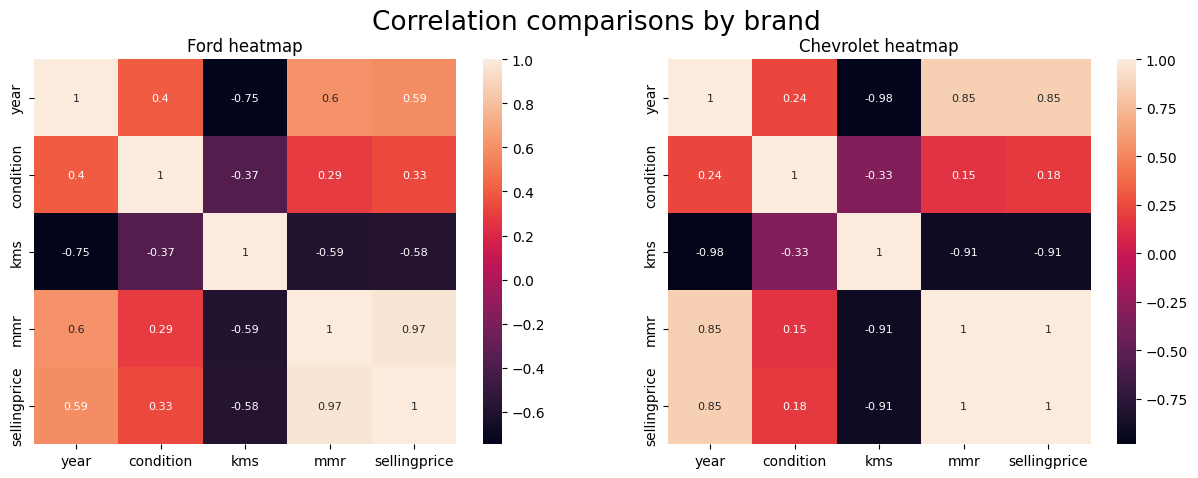

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# plot 1
sns.heatmap(df_corr_ford, annot=True,annot_kws={"size": 8}, ax=axes[0])
axes[0].set_title('Ford heatmap')

#plot 2
sns.heatmap(df_corr_chev.corr(), annot=True,annot_kws={"size": 8}, ax=axes[1])
axes[1].set_title('Chevrolet heatmap')

fig.suptitle("Correlation comparisons by brand", fontsize=19)

plt.show()

## New Cars

Hagamos foco en los autos 0km.

*Let's focus on brand new (0km) cars.*

In [87]:
df_0km = df[df['year'] == 2015].reset_index()


### statistics

In [88]:
df_0km.describe()

index    year    condition           kms            mmr  \
count    7994.000000  7994.0  7994.000000   7994.000000    7994.000000   
mean   383433.584438  2015.0    30.203778  12183.329747   26707.805854   
std    141775.894393     0.0    19.185338   7692.913737   13211.266384   
min         0.000000  2015.0     1.000000      1.000000    7200.000000   
25%    288412.250000  2015.0     5.000000   6435.250000   17512.500000   
50%    426982.500000  2015.0    42.000000  11502.500000   22100.000000   
75%    496737.750000  2015.0    46.000000  16726.000000   33200.000000   
max    558835.000000  2015.0    49.000000  61150.000000  170000.000000   

        sellingprice  
count    7994.000000  
mean    26168.987991  
std     13554.545388  
min      1100.000000  
25%     17200.000000  
50%     21850.000000  
75%     33100.000000  
max    173000.000000

### Precio de autos 0km

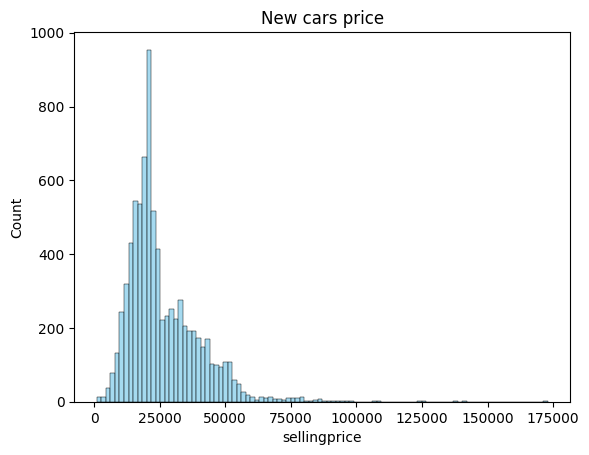

In [89]:
sns.histplot(df_0km['sellingprice'], color='skyblue', bins= 100)
plt.title('New cars price')
plt.show()

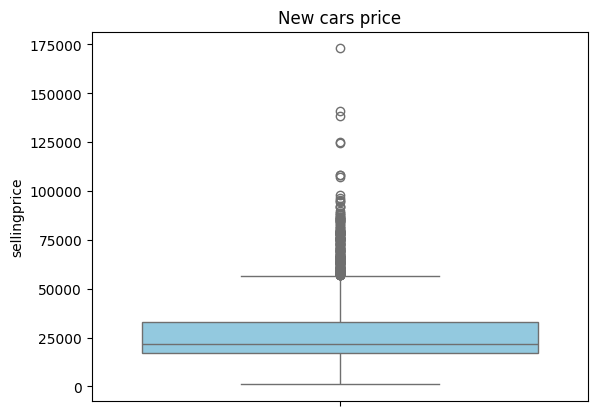

In [90]:
sns.boxplot(df_0km['sellingprice'], color='skyblue')
plt.title('New cars price')
plt.show()

### Marcas de 0kms más vendidas

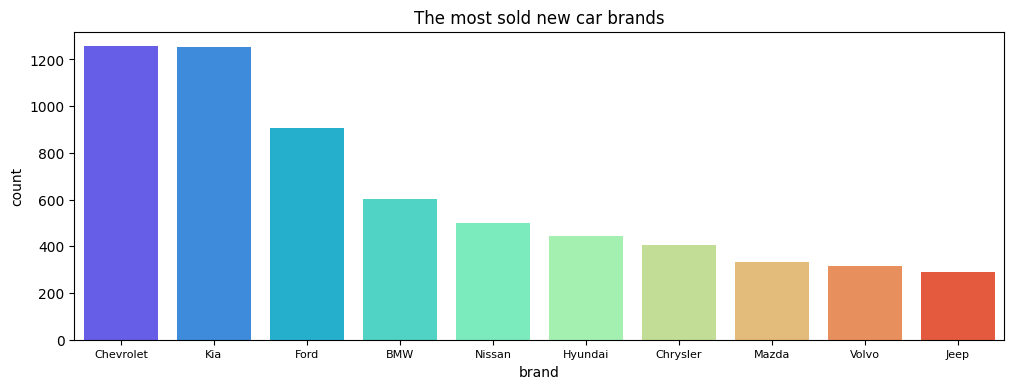

In [91]:
plt.figure(figsize=(12,4))
sort_brands = df_0km.brand.value_counts().head(10)
sns.barplot(sort_brands, palette='rainbow')
plt.title("The most sold new car brands")
plt.xticks(fontsize=8)
plt.show()

## Car sales in California

Que pasa en California? Porque se venden más autos que en el resto del país?

*What's happening in California? Why are more cars sold there than in the rest of the country?*

In [98]:
df_ca = df[df['state']=="ca"]

### Basic statistics

In [99]:
df_ca.describe()

year     condition            kms            mmr  sellingprice
count  66213.000000  66213.000000   66213.000000   66213.000000   66213.00000
mean    2009.926978     30.804751   66750.579191   14868.595291   14895.25865
std        3.997598     13.135032   53011.864063   11674.400182   11674.14761
min     1990.000000      1.000000       1.000000      25.000000     100.00000
25%     2007.000000     25.000000   27731.000000    7400.000000    7500.00000
50%     2012.000000     35.000000   50633.000000   12450.000000   12500.00000
75%     2013.000000     41.000000   96968.000000   19700.000000   19750.00000
max     2015.000000     49.000000  999999.000000  176000.000000  173000.00000

### Average price by year comparison

In [100]:
# Agrupar por la columna 'year' y calcular la media de las variables numéricas
mean_sell_ca = df_ca.groupby('year')['sellingprice'].mean()

mean_sell_ca = pd.DataFrame(mean_sell_ca).reset_index()

In [101]:
# Plotting with Plotly Express
fig = px.line(title="Average car prices comparison: USA vs California", template="plotly_dark")#, animated_frame = "year")
fig.add_scatter(x=mean_sell_ca['year'], y=mean_sell_ca['sellingprice'],
                mode='lines', name='Average price  in California')
fig.add_scatter(x=mean_sell['year'], y=mean_sell['sellingprice'],
                mode='lines', name='Average price in USA')

# Show plot
fig.show()

### Kms and selling price

In [102]:
px.scatter(df_ca,
           x="kms",
           y="sellingprice",
           size="condition",
           color="brand",
           template="plotly_dark",
           color_discrete_sequence = px.colors.qualitative.Prism,
           title="Price and kms throught the years in California",
           labels={"kms": "Kms", "sellingprice" :"Price",
                   "condition" : "condition", "brand" : "Brand"})


# Day of highest sales

El día que más ventas se han registrado es el 13 de enero de 2015. Veamos que información obtenemos de los registros de ese día.

*The day with the highest sales recorded is January 13, 2015. Let's examine the information we can obtain from the records of that day.*

In [103]:
df['saledate'].value_counts().head(1)

saledate
2015-01-13    18750
Name: count, dtype: int64

In [104]:
df['saledate'] = pd.to_datetime(df['saledate'])

In [ ]:
df['saledate'].isna().sum()

In [106]:
df_DOHS = df[df['saledate'] == "2015-01-13"].reset_index()

## Basic statistics

In [107]:
m1 = df_DOHS['sellingprice'].mean()
m2 = df['sellingprice'].mean()
# Creación del DataFrame con las medias
df_mean = pd.DataFrame({'Mean': [m1, m2]}, index=['df_DOHS', 'df'])

In [114]:
df_DOHS.describe()

index          year     condition            kms  \
count   18750.000000  18750.000000  18750.000000   18750.000000   
mean   109243.567520   2009.553973     30.063360   73466.789493   
min        12.000000   1990.000000      1.000000       1.000000   
25%    102880.000000   2007.000000     23.000000   30197.250000   
50%    114761.500000   2011.000000     34.000000   59543.500000   
75%    126812.750000   2013.000000     41.000000  107485.750000   
max    144226.000000   2015.000000     49.000000  999999.000000   
std     26112.034994      4.053886     13.596461   55633.765189   

                 mmr   sellingprice             saledate  
count   18750.000000   18750.000000                18750  
mean    12587.353333   12434.522133  2015-01-13 00:00:00  
min        25.000000     200.000000  2015-01-13 00:00:00  
25%      6000.000000    5700.000000  2015-01-13 00:00:00  
50%     11450.000000   11200.000000  2015-01-13 00:00:00  
75%     16950.000000   17000.000000  2015-01-13 00:00:00  
max    154000.000000  169500.000000  2015-01-13 00:00:00  
std      8773.292400    8941.837823                  NaN

## Barplot

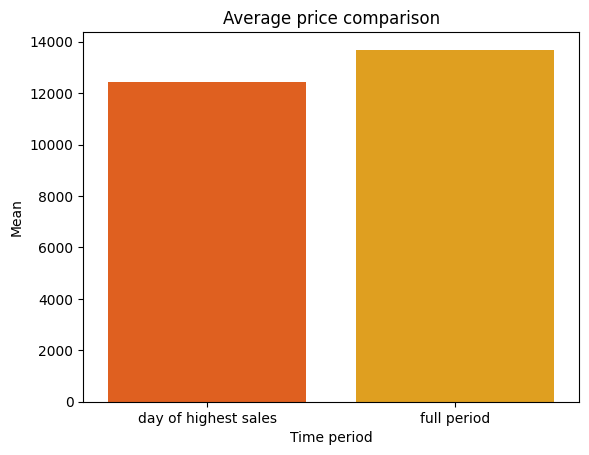

In [108]:
sns.barplot(x=df_mean.index, y='Mean', data=df_mean, palette="autumn")
plt.title("Average price comparison")
plt.xlabel("Time period")
plt.xticks(ticks=range(len(df_mean.index)), labels=['day of highest sales', 'full period'])
plt.show()

## Comparison of histograms

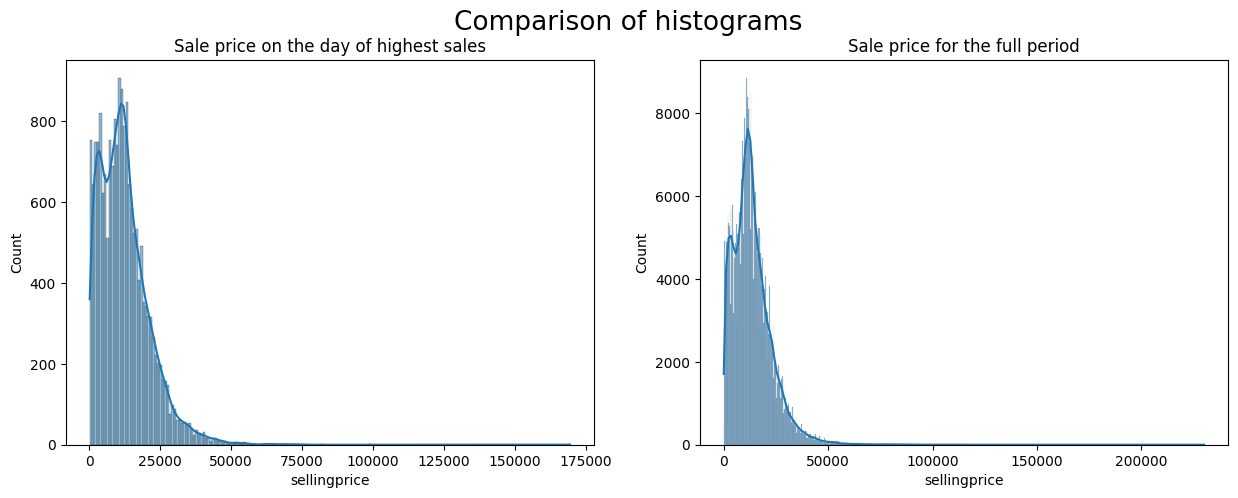

In [109]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# plot 1
sns.histplot(df_DOHS, x="sellingprice", kde=True, ax=axes[0])
axes[0].set_title('Sale price on the day of highest sales')

#plot 2
sns.histplot(df, x="sellingprice", kde=True, ax=axes[1])
axes[1].set_title('Sale price for the full period')

fig.suptitle("Comparison of histograms", fontsize=19)

plt.show()